In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('flying-etiquette.csv')

In [5]:
df.head()

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific


In [6]:
#remove blanks or duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
df['How tall are you?'].replace('Under 5 ft', '5 ft', inplace=True)

In [11]:
def htoi(height):
    try:
        feet, inches = height.split("'")
        total_inches = int(feet) * 12 + int(inches.strip('"'))
        return total_inches
    except ValueError:
        return None 

In [12]:
df['Height (Inches)'] = df['How tall are you?'].apply(htoi)

In [15]:
column_mapping = {
    'RespondentID': 'ID',
    'How often do you travel by plane?': 'Travel frequency',
    'Do you ever recline your seat when you fly?': 'Seat recline behavior',
    'How tall are you?': 'Height',
    'Do you have any children under 18?': 'Children under 18',
    'In a row of three seats, who should get to use the two arm rests?': 'Arm rests in row of three',
    'In a row of two seats, who should get to use the middle arm rest?': 'Middle arm rest in row of two',
    'Who should have control over the window shade?': 'Window shade control',
    'Is itrude to move to an unsold seat on a plane?': 'Moving to unsold seat etiquette',
    'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?': 'Talking to stranger etiquette',
    'On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you\'re not in an aisle seat?': 'Number of bathroom breaks',
    'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?': 'Obligation to person behind when reclining',
    'Is it rude to recline your seat on a plane?': 'Seat recline etiquette',
    'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?': 'Opinion on reclining seats elimination',
    'Is it rude to ask someone to switch seats with you in order to be closer to friends?': 'Asking to switch seats for friends etiquette',
    'Is it rude to ask someone to switch seats with you in order to be closer to family?': 'Asking to switch seats for family etiquette',
    'Is it rude to wake a passenger up if you are trying to go to the bathroom?': 'Waking passenger for bathroom etiquette',
    'Is it rude to wake a passenger up if you are trying to walk around?': 'Waking passenger to walk around etiquette',
    'In general, is itrude to bring a baby on a plane?': 'Bringing baby on plane etiquette',
    'In general, is it rude to knowingly bring unruly children on a plane?': 'Bringing unruly children on plane etiquette',
    'Have you ever used personal electronics during take off or landing in violation of a flight attendant\'s direction?': 'Use of personal electronics violation',
    'Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?': 'Smoking in airplane bathroom violation',
    'Gender': 'Gender',
    'Age': 'Age',
    'Household Income': 'Household Income',
    'Education': 'Education',
    'Location (Census Region)': 'Location (Census Region)'
}

df.rename(columns=column_mapping, inplace=True)


In [16]:
df.head()

,ID,Travel frequency,Seat recline behavior,Height,Children under 18,Arm rests in row of three,Middle arm rest in row of two,Window shade control,Moving to unsold seat etiquette,Talking to stranger etiquette,...,Bringing baby on plane etiquette,Bringing unruly children on plane etiquette,Use of personal electronics violation,Smoking in airplane bathroom violation,Gender,Age,Household Income,Education,Location (Census Region),Height (Inches)
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific,68.0
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific,71.0
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific,67.0
5,3434245875,Once a year or less,Usually,"5'9""",Yes,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"Yes, somewhat rude","No, not at all rude",...,"Yes, very rude","Yes, very rude",No,No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central,69.0
6,3434235351,Once a month or less,Once in a while,"6'2""",Yes,The person in the middle seat gets both arm rests,Whoever puts their arm on the arm rest first,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","Yes, somewhat rude",No,No,Male,30-44,150000,Some college or Associate degree,Pacific,74.0


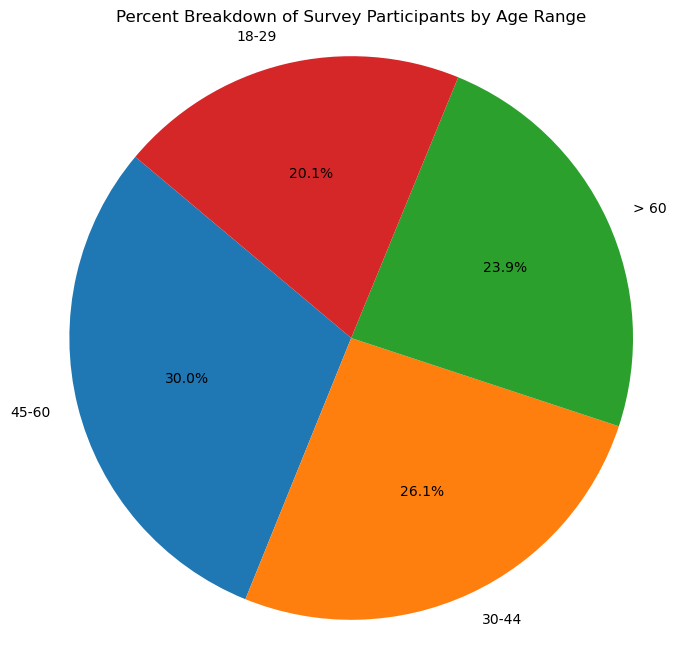

In [43]:
age_counts = df['Age'].value_counts()
percentages = (age_counts / len(df)) * 100

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percent Breakdown of Survey Participants by Age Range')
plt.show()

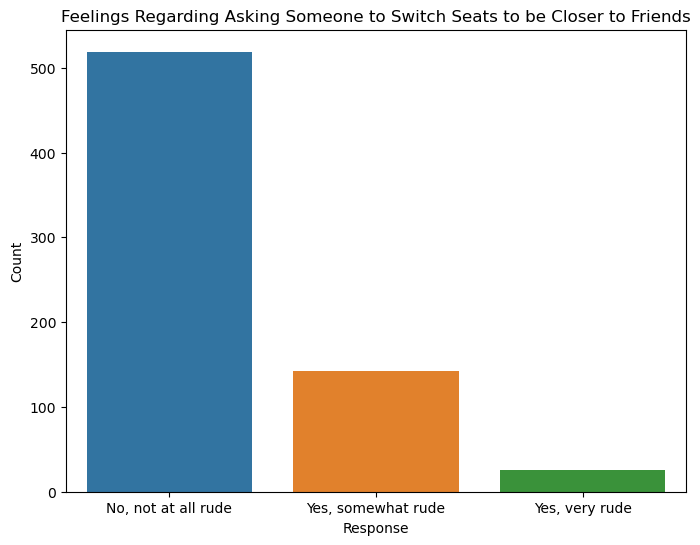

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Asking to switch seats for friends etiquette')
plt.title('Feelings Regarding Asking Someone to Switch Seats to be Closer to Friends')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

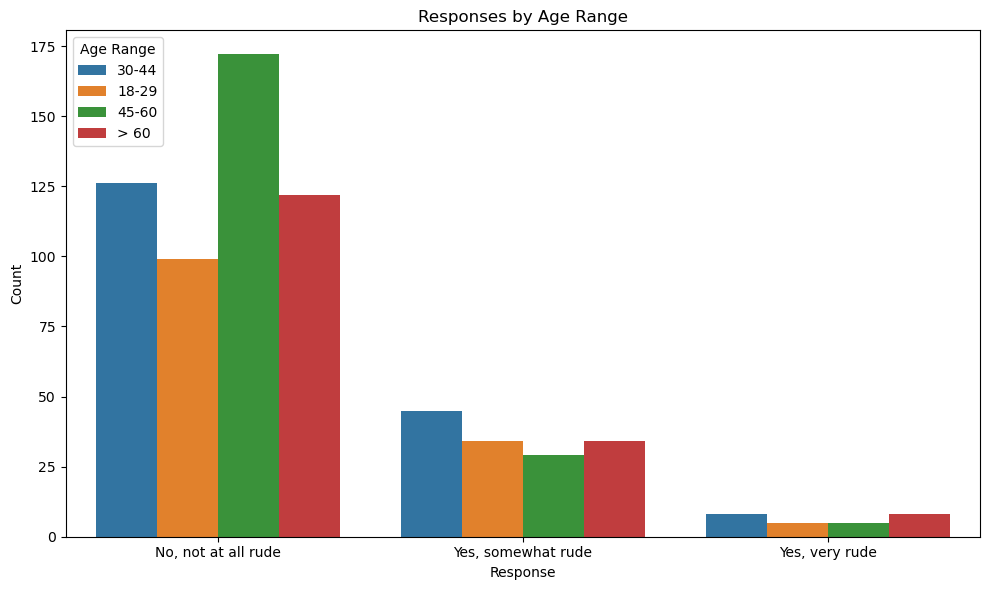

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Asking to switch seats for friends etiquette', hue='Age')
plt.title('Responses by Age Range')
plt.xlabel('Response')
plt.ylabel('Count')
plt.legend(title='Age Range', loc='upper left')
plt.tight_layout()
plt.show()